<a href="https://colab.research.google.com/github/adnaksbhat/Colab_JupyterNotebooks/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extras

In [ ]:
#filter a col

#example u want to retrieve all rows for a col value udupi

df=df[df['city']=='udupi']

axis=0   # row level
axis="column'  # column level

In [ ]:
# prompt: difference between precision and recall

# Precision and Recall

# Precision: Out of all the items predicted as positive, how many are actually positive?
# It focuses on the accuracy of positive predictions.

# Recall: Out of all the actual positive items, how many were correctly predicted as positive?
# It focuses on the ability to find all positive items.


# Example:
# Imagine a model that detects spam emails.

# True Positives (TP): Spam emails correctly identified as spam.
# False Positives (FP): Legitimate emails incorrectly identified as spam.
# True Negatives (TN): Legitimate emails correctly identified as not spam.
# False Negatives (FN): Spam emails incorrectly identified as not spam.

# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)

# High Precision: Few false positives, meaning the model is very accurate when it predicts something as positive.
# High Recall: Few false negatives, meaning the model is very good at finding all the actual positive instances.

# Trade-off:
# Often, there's a trade-off between precision and recall.
# Increasing precision might decrease recall, and vice versa.
# The best choice depends on the specific problem and the desired outcome.

# For example, in a medical diagnosis scenario, you might prioritize recall
# (ensuring all potential cases are detected) even if it means accepting more false positives.
# In a spam detection scenario, you might prioritize precision (avoiding legitimate emails being marked as spam)
# even if it means missing some spam emails.

# RE

In [ ]:
# prompt: regular expression to extract date mon and year in "02/12/2024" or "2/12/2024"

pattern = "(\d{1,2})/(\d{1,2})/(\d{4})"
text = "2/12/2024"
match = re.search(pattern, text)
if match:
  day = match.group(1)
  month = match.group(2)
  year = match.group(3)
  print(f"Day: {day}, Month: {month}, Year: {year}")

# Methods are defined here

In [ ]:
stringtext="""Captain america ate 100$ of samosa. Then he said I can do This all days.
Bro, you wanna go and ate? Brah, dont say no. I am tired and going to get exhausted broski
"""

filename="/content/students.txt"

arraytext=['This','is','my','fav','food','eating','eats','eat','ate','adjustable','rafting','ability','meeting']

almightyProcessMethod(stringtext)


 After Tokenization-------->
 captain america ate 100 $ of samosa . then he said i can do this all days . 
 bro , you wanna go and ate ? brah , do nt say no . i am tired and going to get exhausted broski 


 After removing stopwords and punctuations and lemmatizing-------->
 captain america eat 100 $ samosa say day 
  bro wanna eat brah not tired go exhaust broski 


After stemming-------->
 captain america eat 100 $ samosa say day 
  bro wanna eat brah not tire go exhaust broski 



'captain america eat 100 $ samosa say day \n  bro wanna eat brah not tire go exhaust broski \n'

In [ ]:
import os
import nltk
import spacy

nlp=spacy.load('en_core_web_sm')



def almightyProcessMethod(anything):
  if isinstance(anything,str):
    if anything.endswith('.txt'):
      #text file as param
      with open(anything) as f:
        text=f.readlines()

      proper_text = ' '.join(text)

      final_string=complete_preprocess(proper_text)
      return final_string


    else:
      #string as param
      final_string=completePreprocessMethod(anything)
      return final_string

  elif isinstance(anything,list):
    #list/array as param
    tokenized_string=' '.join(anything)

    final_string=completePreprocessMethod(tokenized_string)
    return final_string

  else:
    return "Invalid param passed"


In [ ]:
def completePreprocessMethod(str):



  #Tokenization
  #==================
  token_doc=nlp(str.lower())
  token_array=[]

  for token in token_doc:
    token_array.append(token.text)
    token_string=' '.join(token_array)

  print("\n After Tokenization-------->\n",token_string)


  #remove stopwords and punct and lemmatize
  #==================
  from spacy.lang.en.stop_words import STOP_WORDS

  stoppunclemma_doc=nlp(token_string)
  stoppunclemma_array=[]

  for token in stoppunclemma_doc:

    if not (token.is_stop or token.is_punct):
      stoppunclemma_array.append(token.lemma_)

  stoppunclemma_string=' '.join(stoppunclemma_array)

  print("\n After removing stopwords and punctuations and lemmatizing-------->\n",stoppunclemma_string)




  #stemming
  #==================
  words=stoppunclemma_array
  from nltk.stem import PorterStemmer
  stemmer=PorterStemmer()
  stemmArray=[]

  for i in words:
    stemmArray.append(stemmer.stem(i))

  string_stemm = ' '.join(stemmArray)
  print("\nAfter stemming-------->\n",string_stemm)




  '''
  #lemma
  #==================
  lemma_doc=nlp(string_stemm)

  lemmaArray=[]

  for i in lemma_doc:
    lemmaArray.append(i.lemma_)

  string_lemma = ' '.join(lemmaArray)
  print("\nafter lemmatization-------->\n",string_lemma)

  '''


  final_string=string_stemm

  print("Final string\n")

  return final_string











In [ ]:
#find similarity between a word and a string stamtement
'''
2methods are defined here
1) using spacy similarity
2) using cosine similarity
'''

In [ ]:
import spacy
nlp=spacy.load("en_core_web_lg")

def similarityMethod(wordToCompare, stringStatement ):

  '''
  #using spacy similarity

  similarArray=[]
  base_token=nlp(wordToCompare)
  doc=nlp(stringStatement)

  for token in doc:
    print(base_token.text," | ",token.text," | ",base_token.similarity(token))

    if base_token.similarity(token)>0.5:
      similarArray.append(token.text)

  print("\n\n Similar words using spacy similarity are below")
  return similarArray

  '''

  #using cosine similarity

  similarArray=[]
  base_token=wordToCompare
  doc=stringStatement.split(' ')

  for i in doc:
    print("Token: ",i, "    ", cosine_similarity(    [nlp(base_token).vector]  ,   [nlp(i).vector]))
    if cosine_similarity(    [nlp(base_token).vector]  ,   [nlp(i).vector])>0.5:
      similarArray.append(i)

  print("\n\n Similar words using cosine similarity are below")
  return similarArray






In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import PorterStemmer
from string import punctuation

nlp = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()

def shorter_preprocess(text):
  """
  This method takes a string as input and performs various preprocessing steps.

  Args:
      text: The input string.

  Returns:
      A preprocessed string.
  """

  doc = nlp(text.lower())  # Convert to lowercase and create spacy doc

  tokens = []
  for token in doc:
    if token.text not in STOP_WORDS and token.text not in punctuation:
      tokens.append(token.text)

  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  lemmatized_tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.text not in punctuation]


  processed_text = " ".join(lemmatized_tokens)

  return processed_text

In [ ]:
def tokenizationMethod(str):


  doc=nlp(str)

  a=[]

  for token in doc:
    a.append(token.text)
    token_string=' '.join(a)

  print("\n After Tokenization-------->\n",token_string)

  return token_string


In [ ]:
def stemmLemmaMethod(text):

  #words=tokenizationMethod(text)


  token_doc=nlp(text)
  token_array=[]

  for token in token_doc:
    token_array.append(token.text)
    token_string=' '.join(token_array)

  print("\n After Tokenization-------->\n",token_string)

  words=token_array

  #stemming
  from nltk.stem import PorterStemmer
  stemmer=PorterStemmer()

  stemmArray=[]

  for i in words:
    stemmArray.append(stemmer.stem(i))

  string_stemm = ' '.join(stemmArray)
  print("\nAfter stemming-------->\n",string_stemm)




  #lemma
  doc=nlp(string_stemm)

  lemmaArray=[]

  for i in doc:
    lemmaArray.append(i.lemma_)

  string_lemma = ' '.join(lemmaArray)
  print("\nafter lemmatization-------->\n",string_lemma)


  final_string=string_lemma


  print("\nFinal string========>\n",final_string)

  return final_string






In [ ]:

  #remove punctuations
  #==================

  punc_doc=nlp(stopwords_string)

  punc_array=[]

  for token in punc_doc:
    if token.pos_ not in ["SPACE", "PUNCT"]:
      print(token.text)
      punc_array.append(token.text)

  punc_string=' '.join(punc_array)

  print("\nafter removing punctuations-------->\n",punc_string)

In [ ]:
# consider array a and to convert to string,
string_s = ' '.join(a)

## NLP flow

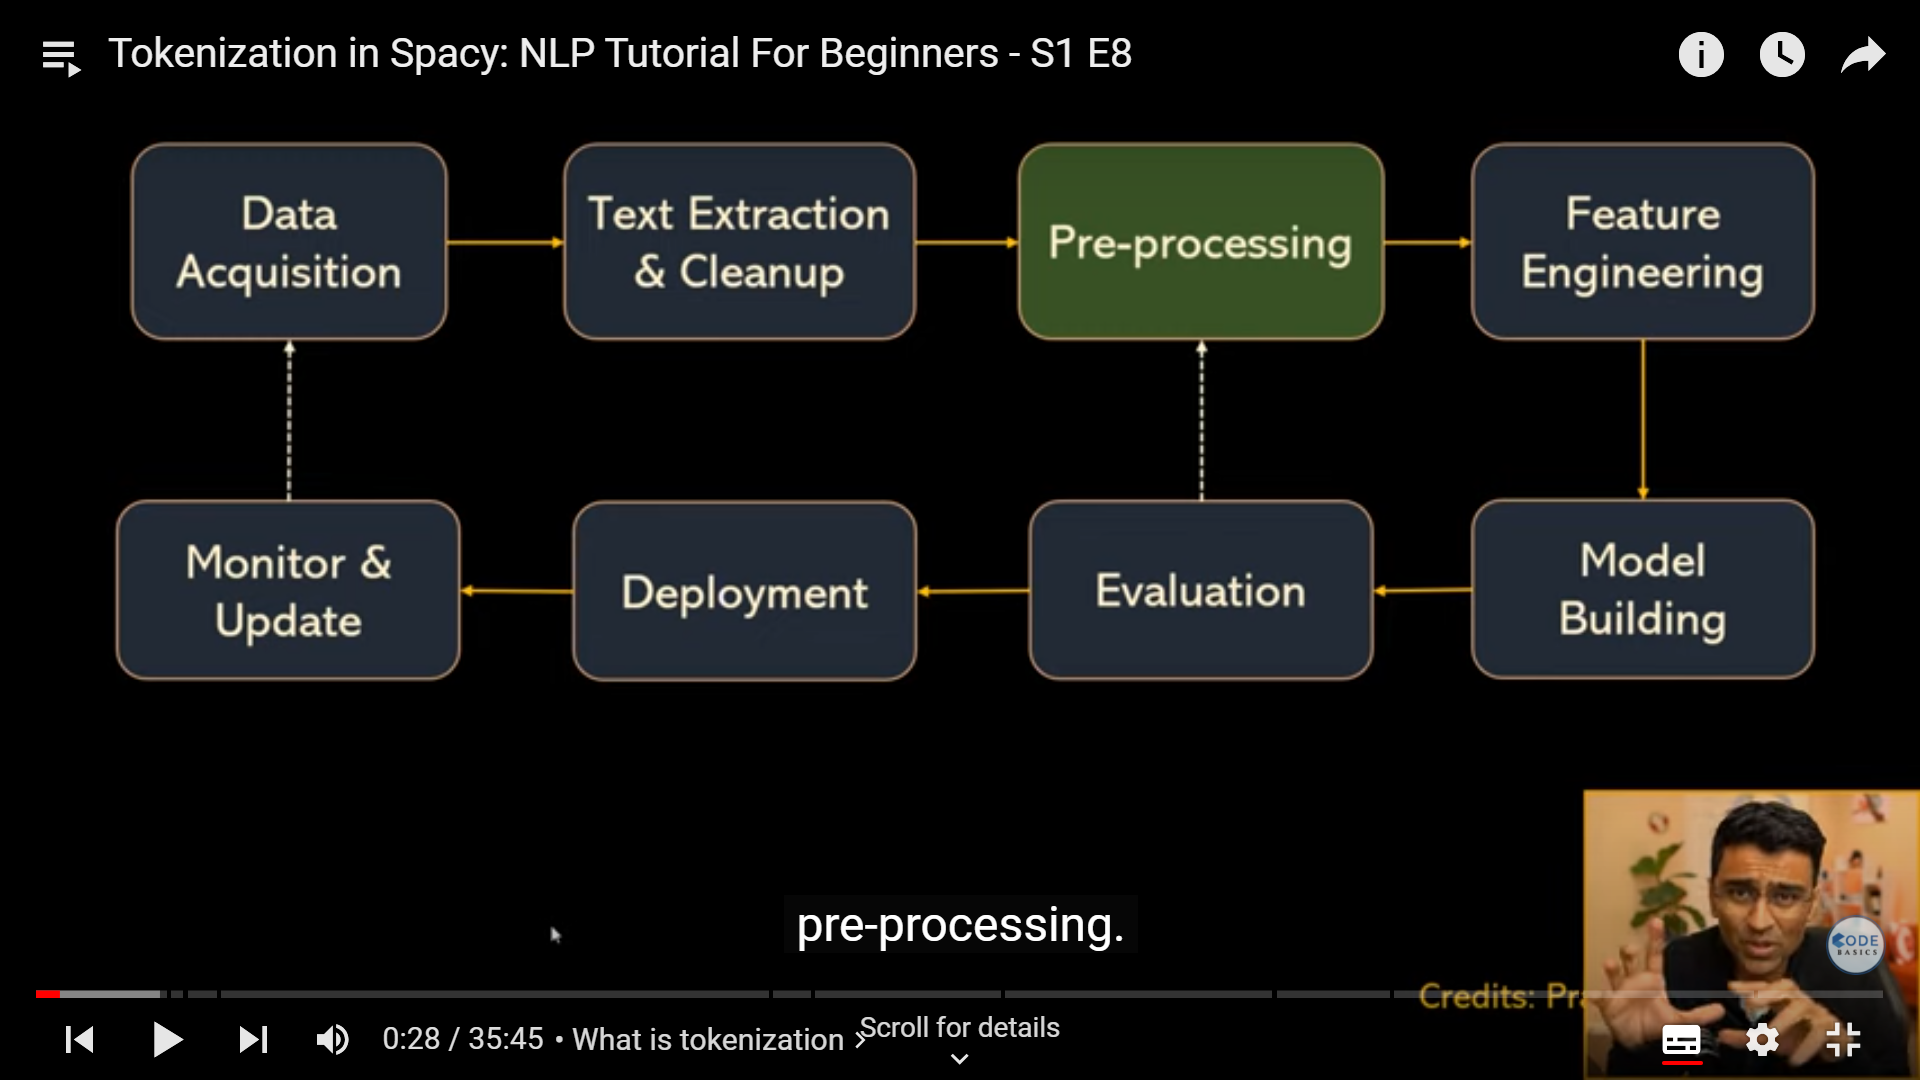

# Spacy vs NLTK

spacy is object oriented
nltk is string processing library



spacy is better

In [ ]:
#spacy

In [ ]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp("This is my fav food and I would travel the world for it. And this has the best vibes")

In [ ]:
for sentence in doc.sents:
    print(sentence)

This is my fav food and I would travel the world for it.
And this has the best vibes


In [ ]:
for sentence in doc.sents:
    for word in sentence:
        print(word)

This
is
my
fav
food
and
I
would
travel
the
world
for
it
.
And
this
has
the
best
vibes


In [ ]:
#nltk

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

sent_tokenize("This is my fav food and I would travel the world for it. And this has the best vibes")

['This is my fav food and I would travel the world for it.',
 'And this has the best vibes']

In [ ]:
from nltk.tokenize import word_tokenize

word_tokenize("This is my fav food and I would travel the world for it. And this has the best vibes")

['This',
 'is',
 'my',
 'fav',
 'food',
 'and',
 'I',
 'would',
 'travel',
 'the',
 'world',
 'for',
 'it',
 '.',
 'And',
 'this',
 'has',
 'the',
 'best',
 'vibes']

# Tokenization

In [ ]:
#using spacy
# sentence tokenization, word tokenization

In [ ]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [ ]:
with open('/content/sample_data/students.txt') as f:
  text=f.readlines()



text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [ ]:
proper_text = ' '.join(text)



proper_text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [ ]:
doc=nlp(proper_text)
doc

Dayton high school, 8th grade students information
 
 Name	birth day   	email
 -----	------------	------
 Virat   5 June, 1882    virat@kohli.com
 Maria	12 April, 2001  maria@sharapova.com
 Serena  24 June, 1998   serena@williams.com 
 Joe      1 May, 1997    joe@root.com
 
 
 

In [ ]:
#suppose u want to collect all emails in the doc

emails=[]

for token in doc:
  if token.like_email:
    emails.append(token.text)

emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

In [ ]:
names=[]

for token in doc:
  if token.is_alpha:
    names.append(token.text)

names

['Dayton',
 'high',
 'school',
 'grade',
 'students',
 'information',
 'Name',
 'birth',
 'day',
 'email',
 'Virat',
 'June',
 'Maria',
 'April',
 'Serena',
 'June',
 'Joe',
 'May']

# Pipeline

after tokenizing, u ll get tagger, parser and more.
this is pipeline


In [ ]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do This all days.")

for token in doc:
  print("Token->  ",token.text,"    |    ","Grammer->  ",token.pos_,"    |    ","Lemmatization->  ",token.lemma_)

Token->   Captain     |     Grammer->   PROPN     |     Lemmatization->   Captain
Token->   america     |     Grammer->   PROPN     |     Lemmatization->   america
Token->   ate     |     Grammer->   VERB     |     Lemmatization->   eat
Token->   100     |     Grammer->   NUM     |     Lemmatization->   100
Token->   $     |     Grammer->   NUM     |     Lemmatization->   $
Token->   of     |     Grammer->   ADP     |     Lemmatization->   of
Token->   samosa     |     Grammer->   PROPN     |     Lemmatization->   samosa
Token->   .     |     Grammer->   PUNCT     |     Lemmatization->   .
Token->   Then     |     Grammer->   ADV     |     Lemmatization->   then
Token->   he     |     Grammer->   PRON     |     Lemmatization->   he
Token->   said     |     Grammer->   VERB     |     Lemmatization->   say
Token->   I     |     Grammer->   PRON     |     Lemmatization->   I
Token->   can     |     Grammer->   AUX     |     Lemmatization->   can
Token->   do     |     Grammer->   VERB    

In [ ]:
doc=nlp("Tesla Inc and BCCI is going to profit for 120 million dollars and 2 crore INR respectively")

for i in doc.ents:
  print("Token->  ",i.text,"    |    ","Label->  ",i.label_,"    |    ","Explaination->  ",spacy.explain(i.label_) )

Token->   Tesla Inc     |     Label->   ORG     |     Explaination->   Companies, agencies, institutions, etc.
Token->   BCCI     |     Label->   ORG     |     Explaination->   Companies, agencies, institutions, etc.
Token->   120 million dollars     |     Label->   MONEY     |     Explaination->   Monetary values, including unit
Token->   2     |     Label->   CARDINAL     |     Explaination->   Numerals that do not fall under another type
Token->   INR     |     Label->   ORG     |     Explaination->   Companies, agencies, institutions, etc.


In [ ]:
from spacy import displacy

displacy.render(doc,style='ent')

# Stemming | Lemmatization | POS(part of speech)

In [ ]:
import os
import nltk
import spacy
nlp=spacy.load('en_core_web_sm')


def almightyProcessMethod(anything):
  if isinstance(anything,str):
    if anything.endswith('.txt'):
      #text file as param
      with open(anything) as f:
        text=f.readlines()

      proper_text = ' '.join(text)
      final_stemmalemma=stemmLemmaMethod(proper_text)


    else:
      #string as param

      final_stemmalemma=stemmLemmaMethod(anything)

  elif isinstance(anything,list):
    #list/array as param
    token_string=' '.join(anything)

    final_stemmalemma=stemmLemmaMethod(token_string)

  else:
    return "Invalid param passed"


In [ ]:
def tokenizationMethod(str):


  doc=nlp(str)

  a=[]

  for token in doc:
    a.append(token.text)
    token_string=' '.join(a)

  print("\n After Tokenization-------->\n",token_string)

  return a


In [ ]:
def stemmLemmaMethod(text):

  words=tokenizationMethod(text)

  #stemming
  from nltk.stem import PorterStemmer
  stemmer=PorterStemmer()

  stemmArray=[]

  for i in words:
    stemmArray.append(stemmer.stem(i))

  string_stemm = ' '.join(stemmArray)
  print("\nAfter stemming-------->\n",string_stemm)


  #lemma
  doc=nlp(string_stemm)

  lemmaArray=[]

  for i in doc:
    lemmaArray.append(i.lemma_)

  string_lemma = ' '.join(lemmaArray)
  print("\nafter lemmatization-------->\n",string_lemma)


  final_string=string_lemma


  print("\nFinal string========>\n",final_string)

  return final_string






In [ ]:
stringtext="""Captain america ate 100$ of samosa. Then he said I can do This all days.
Bro, you wanna go and ate? Brah, dont say no. I am tired and going to get exhausted broski
"""

filename="/content/students.txt"

arraytext=['This','is','my','fav','food','eating','eats','eat','ate','adjustable','rafting','ability','meeting']

almightyProcessMethod(arraytext)


 After Tokenization-------->
 This is my fav food eating eats eat ate adjustable rafting ability meeting

After stemming-------->
 thi is my fav food eat eat eat ate adjust raft abil meet

after lemmatization-------->
 thi be my fav food eat eat eat eat adjust raft abil meet

Final string========>
 thi be my fav food eat eat eat eat adjust raft abil meet


Stemming:
reducing the words suffixes.
Example: talking->talk , adjustable->adjust

Lemmatization:
reducing the word to its base word.
Example: ate->eat

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# nltk can handle both stemming and lemma
# spacy can handle only lemma

In [ ]:
import nltk
import spacy

nlp=spacy.load('en_core_web_sm')

In [ ]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [ ]:
words=['eating','eats','eat','ate','adjustable','rafting','ability','meeting']

for word in words:
  print(word," | ",stemmer.stem(word))

eating  |  eat
eats  |  eat
eat  |  eat
ate  |  ate
adjustable  |  adjust
rafting  |  raft
ability  |  abil
meeting  |  meet


In [ ]:
#lemma

doc=nlp("Bro, you wanna go and ate? Brah, dont say no. I am tired and going to get exhausted broski")

for token in doc:
  print(token.text, "----", token.lemma_)

Bro ---- bro
, ---- ,
you ---- you
wanna ---- wanna
go ---- go
and ---- and
ate ---- eat
? ---- ?
Brah ---- Brah
, ---- ,
do ---- do
nt ---- not
say ---- say
no ---- no
. ---- .
I ---- I
am ---- be
tired ---- tired
and ---- and
going ---- go
to ---- to
get ---- get
exhausted ---- exhausted
broski ---- broski


In [ ]:
# in above we can see bro, brah is not same and not reduced to root

# u can hardcode it to change. add it to artribute _ruler


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
#use artribute_ruler

ar=nlp.get_pipe('attribute_ruler')

ar.add(     [ [{"TEXT":"Bro"}],   [{"TEXT":"Bruh"}],  [{"TEXT":"Broski"}] ]  , {"LEMMA":"Brother"} )


doc=nlp("Bro, you wanna go and ate? Brah, dont say no. I am tired and going to get exhausted broski")

for token in doc:
  print(token.text, "----", token.lemma_)



Bro ---- Brother
, ---- ,
you ---- you
wanna ---- wanna
go ---- go
and ---- and
ate ---- eat
? ---- ?
Brah ---- Brah
, ---- ,
do ---- do
nt ---- not
say ---- say
no ---- no
. ---- .
I ---- I
am ---- be
tired ---- tired
and ---- and
going ---- go
to ---- to
get ---- get
exhausted ---- exhausted
broski ---- Brother


In [ ]:
#pos


doc=nlp("Captain america eats          100$ of samosa.          Then he said I can do This all days.")


for token in doc:
  print(token.text," | ",token.pos_," | ", spacy.explain(token.pos_)," | ", token.tag_, " | ", spacy.explain(token.tag_)," | ")

Captain  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular  | 
america  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular  | 
eats  |  VERB  |  verb  |  VBZ  |  verb, 3rd person singular present  | 
           |  SPACE  |  space  |  _SP  |  whitespace  | 
100  |  NUM  |  numeral  |  CD  |  cardinal number  | 
$  |  NUM  |  numeral  |  CD  |  cardinal number  | 
of  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition  | 
samosa  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular  | 
.  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer  | 
           |  SPACE  |  space  |  _SP  |  whitespace  | 
Then  |  ADV  |  adverb  |  RB  |  adverb  | 
he  |  PRON  |  pronoun  |  PRP  |  pronoun, personal  | 
said  |  VERB  |  verb  |  VBD  |  verb, past tense  | 
I  |  PRON  |  pronoun  |  PRP  |  pronoun, personal  | 
can  |  AUX  |  auxiliary  |  MD  |  verb, modal auxiliary  | 
do  |  VERB  |  verb  |  VB  |  verb, base form  | 

In [ ]:
# remove above punctuations and space

doc=nlp("Captain america eats          100$ of samosa.          Then he said I can do This all days.")

a=[]

for token in doc:
  if token.pos_ not in ["SPACE", "PUNCT"]:
    print(token.text)
    a.append(token)


print(a)

Captain
america
eats
100
$
of
samosa
Then
he
said
I
can
do
This
all
days
[Captain, america, eats, 100, $, of, samosa, Then, he, said, I, can, do, This, all, days]


# NER (named entity recog)

In [ ]:
# entity can be company, person, product, etc

In [ ]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
# all entities listed here

nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [ ]:
doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

In [ ]:
for i in doc.ents:
  print(i.text, " | ", i.label_, " | ", spacy.explain(i.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [ ]:
from spacy import displacy

displacy.render(doc,style='ent')

In [ ]:
# sometimes it wont recognize many properly.  (above twitter is nor recognized)

In [ ]:
# so u can explicitly give labels to entities using "SPAN"

In [ ]:
#example

In [ ]:
from spacy.tokens import Span


import spacy
nlp=spacy.load('en_core_web_sm')


In [ ]:
doc=nlp("Tesla Inc is going to acquire twitter for $45 billion")

In [ ]:
s1=Span(doc,0,1,label='ORG')       #0,1 returns 0th index.... and labels it as ORG.      # note->  (0,4  will return 0,1,2,3  but not 4)
s2=Span(doc,6,7,label='ORG')

doc.set_ents([s1,s2],default='unmodified')

In [ ]:
for i in doc.ents:
  print(i.text, " | ", i.label_, " | ", spacy.explain(i.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
twitter  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


#Stop words

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
len(STOP_WORDS)

326

In [ ]:
nlp=spacy.load("en_core_web_sm")

doc=nlp("We just opened out wings and are ready to fly high in the sky")

a=[]
for token in doc:
  if not token.is_stop:
    a.append(token.text)

print(a)

['opened', 'wings', 'ready', 'fly', 'high', 'sky']


# Methods to Convert text to vector

In [ ]:
#label encoding
#one hot encoding
#bag of words  -- gets count of most repetating words
#tf-idf
#word embeddings

In [ ]:
# best approach is

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text="Thor and Heimdal are looking for a job and are unemployed"


v=CountVectorizer(ngram_range=(1,3))     #this will give single words, pair of words (bigram), trigram
v.fit([text])


CountVectorizer(ngram_range=(1, 3))

In [ ]:
v.vocabulary_

{'thor': 21,
 'and': 0,
 'heimdal': 12,
 'are': 5,
 'looking': 18,
 'for': 9,
 'job': 15,
 'unemployed': 24,
 'thor and': 22,
 'and heimdal': 3,
 'heimdal are': 13,
 'are looking': 6,
 'looking for': 19,
 'for job': 10,
 'job and': 16,
 'and are': 1,
 'are unemployed': 8,
 'thor and heimdal': 23,
 'and heimdal are': 4,
 'heimdal are looking': 14,
 'are looking for': 7,
 'looking for job': 20,
 'for job and': 11,
 'job and are': 17,
 'and are unemployed': 2}

# A json file with news article
has coloumns text and category

todo:
balance the dataset

label encode

train using naive bayes (coz its text doc)

using vectorizer and n grams with this

now train again after preproccessing text

In [ ]:
# example -------- news article json file


In [ ]:
import pandas as pd

df=pd.read_json("/content/news_dataset.json")

In [ ]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [ ]:
df['category'].value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


In [ ]:
# there are lots of class imbalance  by seeing this

In [ ]:
#undersampling to balance----------this is not a god method. use smote instead

#undersampling

min_sample=1381

df_business=df[df['category']=='BUSINESS'].sample(min_sample,random_state=20)     #business category reduce it to min_samples
df_sports=df[df['category']=='SPORTS'].sample(min_sample,random_state=20)
df_crime=df[df['category']=='CRIME'].sample(min_sample,random_state=20)
df_science=df[df['category']=='SCIENCE'].sample(min_sample,random_state=20)


In [ ]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)

df_balanced.category.value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


In [ ]:
# before training convert category to numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()




df_balanced['categoryNumber']=le.fit_transform(df_balanced['category'])


df_balanced

,text,category,categoryNumber
9193,5 Ways to Lead Millennials in the Workplace Mi...,BUSINESS,0
2338,The Disruption of Leadership: Implications for...,BUSINESS,0
11252,Phil Mickelson Agrees To Pay Back Money He Mad...,BUSINESS,0
2683,Follow Panama: Dollarize Most central banks do...,BUSINESS,0
10854,American Cities Losing The Most Jobs This Year...,BUSINESS,0
...,...,...,...
8400,Space Debris To Collide With Earth On Friday T...,SCIENCE,2
11443,"King Tut Mystery Deepens As Metals, Organic Ma...",SCIENCE,2
2480,Security Camera Films Meteor Streaking Across ...,SCIENCE,2
4280,Manmade Earthquakes Are Putting Even More Of T...,SCIENCE,2


In [ ]:
from sklearn.model_selection import train_test_split

X=df_balanced.text
y=df_balanced.categoryNumber

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=20, stratify=y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.71      0.91      0.80       276
           1       0.88      0.87      0.87       276
           2       0.92      0.78      0.84       276
           3       0.91      0.80      0.85       277

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [ ]:
#now train again but preprocess text this time

df_balanced['preprocessed_text']=df_balanced['text'].apply(almightyProcessMethod)

Streaming output truncated to the last 5000 lines.
 After Tokenization-------->
 If You Ca n't Stand the Heat , Get Out of the Universe As we continue this planetary - scale geoengineering experiment of pumping carbon dioxide into the atmosphere and seeing what happens , it 's worth considering that maybe this path has already been taken by predecessors a long time ago , in galaxies far , far away .

 After removing stopwords and punctuations and lemmatizing-------->
 stand heat Universe continue planetary scale geoengineering experiment pump carbon dioxide atmosphere see happen worth consider maybe path take predecessor long time ago galaxy far far away

After stemming-------->
 stand heat univers continu planetari scale geoengin experi pump carbon dioxid atmospher see happen worth consid mayb path take predecessor long time ago galaxi far far away

 After Tokenization-------->
 Outer Space Is Coming To Postage Stamps Near You Pluto , the moon and Star Trek will be featured in 2016 st

In [ ]:
df_balanced.head()

,text,category,categoryNumber,preprocessed_text
9193,5 Ways to Lead Millennials in the Workplace Mi...,BUSINESS,0,5 way lead millenni workplac millenni differ g...
2338,The Disruption of Leadership: Implications for...,BUSINESS,0,disrupt leadership implic femal entrepreneursh...
11252,Phil Mickelson Agrees To Pay Back Money He Mad...,BUSINESS,0,phil mickelson agre pay money connect insid tr...
2683,Follow Panama: Dollarize Most central banks do...,BUSINESS,0,follow panama dollar central bank thing produc...
10854,American Cities Losing The Most Jobs This Year...,BUSINESS,0,american citi lose job year 2 casper wy employ...


In [ ]:
# now retrain with preprocessed data

In [ ]:
from sklearn.model_selection import train_test_split

X=df_balanced.preprocessed_text
y=df_balanced.categoryNumber

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=20, stratify=y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.84      0.88      0.86       276
           1       0.88      0.94      0.91       276
           2       0.92      0.82      0.87       276
           3       0.89      0.87      0.88       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [ ]:
# u can see improvements

In [ ]:
text="today's is Friday and we are going swimming and gymming and we ate things of all sorts! and i am , okay and happy!!"
print(newpreprocess_text(text))

today friday go swim gymming eat thing sort okay happy


In [ ]:
# prompt: give me a method which takes string as input and does lemmatization, stemming, removes stop words, removes punctuations and does other preprocessing

import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import PorterStemmer
from string import punctuation

nlp = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()

def newpreprocess_text(text):
  """
  This method takes a string as input and performs various preprocessing steps.

  Args:
      text: The input string.

  Returns:
      A preprocessed string.
  """

  doc = nlp(text.lower())  # Convert to lowercase and create spacy doc

  tokens = []
  for token in doc:
    if token.text not in STOP_WORDS and token.text not in punctuation:
      tokens.append(token.text)

  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  lemmatized_tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.text not in punctuation]


  processed_text = " ".join(lemmatized_tokens)

  return processed_text



# Tf idf    -> works well with only text data

In [ ]:
# TF IDF      ->   term freq - inverse doc freq

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


#corpus is like set of stmts

corpus=[
        "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
        "Apple is announcing new iphone tomorrow",
        "Tesla  is announcing new model-3 tomorrow",
        "Google is announcing new pixel-6 tomorrow",
        "Microsoft is announcing new surface tomorrow",
        "Amazon is announcing new eco-dot tomorrow",
        "I am eating biryani and you are eating grapes"
]

In [ ]:
v=TfidfVectorizer()
output=v.fit_transform(corpus)

In [ ]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [ ]:
all_feature_names=v.get_feature_names_out()
print(all_feature_names)    #prints in alpabetical order / prints in vocabulary order

['already' 'am' 'amazon' 'and' 'announcing' 'apple' 'are' 'ate' 'biryani'
 'dot' 'eating' 'eco' 'google' 'grapes' 'iphone' 'ironman' 'is' 'loki'
 'microsoft' 'model' 'new' 'pixel' 'pizza' 'surface' 'tesla' 'thor'
 'tomorrow' 'you']


In [ ]:
for word in all_feature_names:
  index=v.vocabulary_.get(word)
  print(word, "--------", (v.idf_[index]))

already -------- 2.386294361119891
am -------- 2.386294361119891
amazon -------- 2.386294361119891
and -------- 2.386294361119891
announcing -------- 1.2876820724517808
apple -------- 2.386294361119891
are -------- 2.386294361119891
ate -------- 2.386294361119891
biryani -------- 2.386294361119891
dot -------- 2.386294361119891
eating -------- 1.9808292530117262
eco -------- 2.386294361119891
google -------- 2.386294361119891
grapes -------- 2.386294361119891
iphone -------- 2.386294361119891
ironman -------- 2.386294361119891
is -------- 1.1335313926245225
loki -------- 2.386294361119891
microsoft -------- 2.386294361119891
model -------- 2.386294361119891
new -------- 1.2876820724517808
pixel -------- 2.386294361119891
pizza -------- 2.386294361119891
surface -------- 2.386294361119891
tesla -------- 2.386294361119891
thor -------- 2.386294361119891
tomorrow -------- 1.2876820724517808
you -------- 2.386294361119891


In [ ]:
# common words like 'is' 'the' should have less values and rare words like 'google' 'tesla' shld have higher value

In [ ]:
#just compare 1 stmts

corpus[:1]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already']

In [ ]:
output.toarray()[:1]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ]])

In [ ]:
# from above array we can see (thor with vocabulary 25 has value 0.24266547)  , (is with voc 17 has value 0.11527033)

# example: tfidf

In [ ]:
import pandas as pd

df=pd.read_csv("/content/Ecommerce_data.csv")

In [ ]:
 df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
# check class imbalance

df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [ ]:
# now u can do basic hardcoding/mapping  or label encoder

In [ ]:
#mapping

df['labelNumber_mapping']=df['label'].map({
    'Household':3,
    'Electronics':2,
    'Clothing & Accessories':1,
    'Books':0
    })

df.head()

,Text,label,labelNumber_mapping,labelNumber_col
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,3,3
1,"Contrast living Wooden Decorative Box,Painted ...",Household,3,3
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,1,1
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,1,1


In [ ]:
#labelencoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['labelNumber_col']=le.fit_transform(df['label'])

df.head()

,Text,label,labelNumber_mapping,labelNumber_col
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,3,3
1,"Contrast living Wooden Decorative Box,Painted ...",Household,3,3
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,1,1
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,1,1


In [ ]:
#training

from sklearn.model_selection import train_test_split
X=df['Text']
y=df['labelNumber_col']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20, stratify=y)


In [ ]:
#using pipeline.    u need to balance before doing this

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

'''
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb',MultinomialNB())
])
'''

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('knn',KNeighborsClassifier()),
    ()
#   ('randomforest', RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.97      0.97      0.97      1200
           3       0.96      0.96      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
X_test[:5]

,Text
20888,Diaz Girl's Soft Cotton Legging (Pr.Klegg_CO4_...
13880,Cello Novelty Shoe Rack (Ice Brown) Color:Ice ...
22544,Amazon Brand - Solimo 100% Cotton 4 Piece Hand...
7151,Kiran’s SSC English Language Chapterwise Solve...
23365,TCLPVC Economy Bamboo Blind Chick Window Close...


In [ ]:
y_test[:5]

,labelNumber_col
20888,1
13880,3
22544,3
7151,0
23365,3


In [ ]:
y_pred[:5]

array([1, 3, 3, 0, 3])

In [ ]:
#properly predicted

#Word embeddings

In [ ]:
# word embedding techniques
'''
word2vec
GloVe
fasttext

#based on transformer architecture,
BERT
GPT



#word2vec example
king -man + woman = queen
'''

'\nword2vec\nGloVe\nfasttext\n\n#based on transformer architecture, \nBERT\nGPT\n\n\n\n#word2vec example\nking -man + woman = queen \n'

In [ ]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [ ]:
doc=nlp("dog cat banana afskfsd")

for token in doc:
  print("  token:  ",token.text, "   vector:  ",token.has_vector, "   OOV:  ",token.is_oov)    #OOV is out of vector   (if not present in vector)

  token:   dog    vector:   True    OOV:   False
  token:   cat    vector:   True    OOV:   False
  token:   banana    vector:   True    OOV:   False
  token:   afskfsd    vector:   False    OOV:   True


In [ ]:
# example

base_token=nlp("bread")

doc=nlp("sandwich burger car tiger bread human wheat")

for token in doc:
  print(base_token.text," | ",token.text," | ",base_token.similarity(token))

bread  |  sandwich  |  0.6341067010130894
bread  |  burger  |  0.47520687769584247
bread  |  car  |  0.06451533308853552
bread  |  tiger  |  0.04764611675903374
bread  |  bread  |  1.0
bread  |  human  |  0.2151154210812192
bread  |  wheat  |  0.6150360888607199


In [ ]:
#similarity between bread and sandwich is similar
# 1 is similar 0 is not

In [ ]:
import spacy
nlp=spacy.load("en_core_web_lg")

def similarityMethod(wordToCompare, stringStatement ):

  '''
  #using spacy similarity

  similarArray=[]
  base_token=nlp(wordToCompare)
  doc=nlp(stringStatement)

  for token in doc:
    print(base_token.text," | ",token.text," | ",base_token.similarity(token))

    if base_token.similarity(token)>0.5:
      similarArray.append(token.text)

  print("\n\n Similar words using spacy similarity are below")
  return similarArray

  '''

  #using cosine similarity

  similarArray=[]
  base_token=wordToCompare
  doc=stringStatement.split(' ')

  for i in doc:
    print("Token: ",i, "    ", cosine_similarity(    [nlp(base_token).vector]  ,   [nlp(i).vector]))
    if cosine_similarity(    [nlp(base_token).vector]  ,   [nlp(i).vector])>0.5:
      similarArray.append(i)

  print("\n\n Similar words using cosine similarity are below")
  return similarArray






In [ ]:
text="sandwich burger car tiger bread human wheat"

similarArrayResult = similarityMethod(  "tyre"  ,  text  )
print(similarArrayResult)

Token:  sandwich      [[0.15780829]]
Token:  burger      [[0.11993817]]
Token:  car      [[0.5369687]]
Token:  tiger      [[0.06548577]]
Token:  bread      [[0.06663954]]
Token:  human      [[-0.05216146]]
Token:  wheat      [[0.06579845]]


 Similar words using cosine similarity are below
['car']


In [ ]:
#cosine similarity method

from sklearn.metrics.pairwise import cosine_similarity

similarArray=[]
wordToCompare="snack"
stringStatement="sandwich burger car tiger bread human wheat"

base_token=nlp(wordToCompare)
doc=stringStatement.split(' ')

for i in doc:
  print("Token: ",i, "    ", cosine_similarity(    [nlp("bread").vector]  ,   [nlp(i).vector]))
  if cosine_similarity(    [nlp("bread").vector]  ,   [nlp(i).vector])>0.5:
    similarArray.append(i)

print("\n\n Similar words are below")
print(similarArray)




Token:  sandwich      [[0.6341069]]
Token:  burger      [[0.47520694]]
Token:  car      [[0.06451534]]
Token:  tiger      [[0.04764611]]
Token:  bread      [[1.0000002]]
Token:  human      [[0.21511543]]
Token:  wheat      [[0.61503613]]


 Similar words are below
['sandwich', 'bread', 'wheat']
